In [1]:
import numpy as np
import pandas as pd
import random
import warnings 
warnings. filterwarnings('ignore')

In [2]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [3]:
len(L)

10000

In [4]:
L[:5]

[3, 3, 10, 11, 6]

In [5]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [6]:
np.cumsum(s)

2     0.0283
3     0.0817
4     0.1682
5     0.2799
6     0.4202
7     0.5850
8     0.7254
9     0.8370
10    0.9184
11    0.9734
12    1.0000
dtype: float64

<AxesSubplot:>

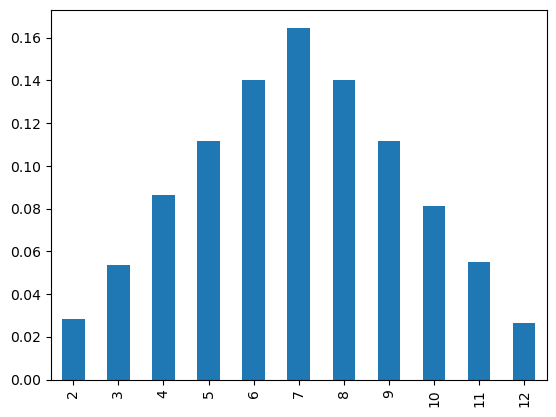

In [7]:
s.plot(kind='bar')

<AxesSubplot:>

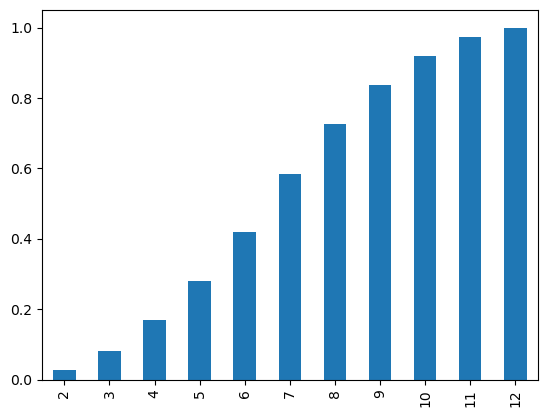

In [8]:
np.cumsum(s).plot(kind='bar')

## Parametric Density Estimation

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
sample = normal(loc=50, scale=5,size=1000)

In [10]:
sample.mean()

49.848556168139446

(array([ 14.,  26.,  95., 172., 269., 218., 121.,  59.,  21.,   5.]),
 array([34.76286191, 37.94163065, 41.12039939, 44.29916813, 47.47793687,
        50.65670561, 53.83547436, 57.0142431 , 60.19301184, 63.37178058,
        66.55054932]),
 <BarContainer object of 10 artists>)

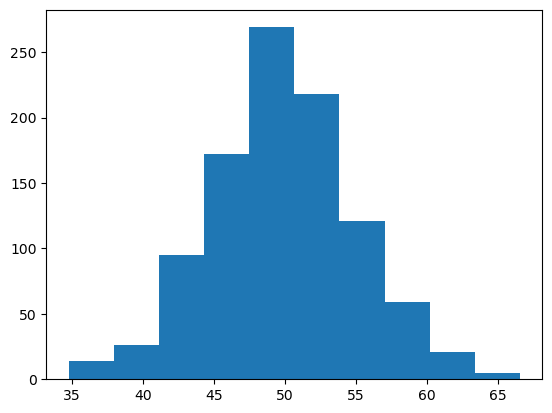

In [11]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [12]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [13]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(60, 12)

In [14]:
values = np.linspace(sample.min(),sample.max(),100)

In [15]:
sample.max()

66.55054932422397

In [16]:
probabilities = [dist.pdf(value) for value in values]

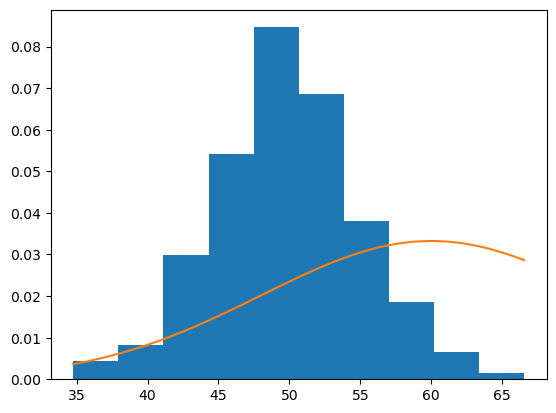

In [17]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<AxesSubplot:ylabel='Density'>

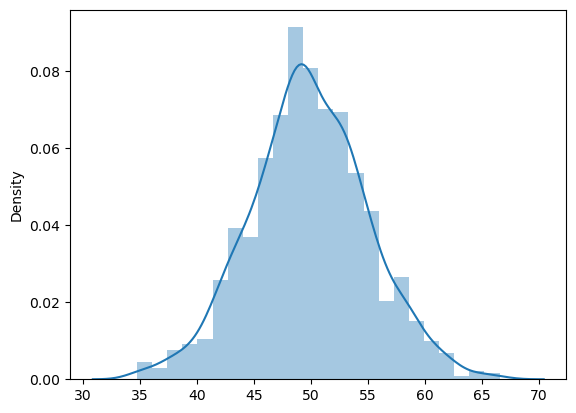

In [18]:
import seaborn as sns
sns.distplot(sample)

## KDE

In [19]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [20]:
sample

array([20.6157166 , 24.65525545, 14.79582735, 25.08871451, 16.28202784,
       20.49712946, 25.59737711, 23.62282769, 30.32592096, 21.6964108 ,
       25.82736664, 22.76266741, 24.60963366, 16.9069542 , 30.54661329,
       26.78372831, 27.62082825, 22.17660065, 15.63910972, 18.53241915,
       15.15809359, 19.91175425, 17.50839635, 15.51918088, 15.94618033,
       25.29880472, 23.96671247,  9.48104162, 25.7459696 , 19.30506622,
       26.02312618, 13.39162585, 24.34393472, 16.89634138, 15.10916261,
       25.99655343, 18.25362189, 17.14652151, 19.08638847, 21.04323049,
       24.55278479, 23.12772887, 24.67348433, 12.95286268, 19.7070273 ,
       29.96663375, 24.20280349, 22.21727224, 12.36962923, 15.89276522,
       20.45631553, 28.80366294, 20.61903914, 20.69425536, 28.28932493,
       26.07706219, 13.46721379, 16.5672868 , 22.27515273, 25.18308134,
       18.31199662, 13.79710564, 27.00029574, 16.76690274, 25.91470925,
       17.39964215, 29.47796028, 21.12972079, 18.18276123, 24.49

(array([ 2.,  1.,  3.,  1.,  1.,  7., 13.,  6., 13., 14., 22., 19., 23.,
        19., 23., 19., 22., 14., 24., 19., 13.,  9., 10., 11., 12., 10.,
        15., 24., 28., 33., 47., 33., 58., 61., 60., 42., 53., 42., 33.,
        33., 34., 22., 22.,  9.,  9.,  5.,  2.,  3.,  1.,  1.]),
 array([ 6.75411293,  7.71761753,  8.68112214,  9.64462674, 10.60813134,
        11.57163595, 12.53514055, 13.49864516, 14.46214976, 15.42565436,
        16.38915897, 17.35266357, 18.31616817, 19.27967278, 20.24317738,
        21.20668198, 22.17018659, 23.13369119, 24.0971958 , 25.0607004 ,
        26.024205  , 26.98770961, 27.95121421, 28.91471881, 29.87822342,
        30.84172802, 31.80523263, 32.76873723, 33.73224183, 34.69574644,
        35.65925104, 36.62275564, 37.58626025, 38.54976485, 39.51326946,
        40.47677406, 41.44027866, 42.40378327, 43.36728787, 44.33079247,
        45.29429708, 46.25780168, 47.22130628, 48.18481089, 49.14831549,
        50.1118201 , 51.0753247 , 52.0388293 , 53.00233391,

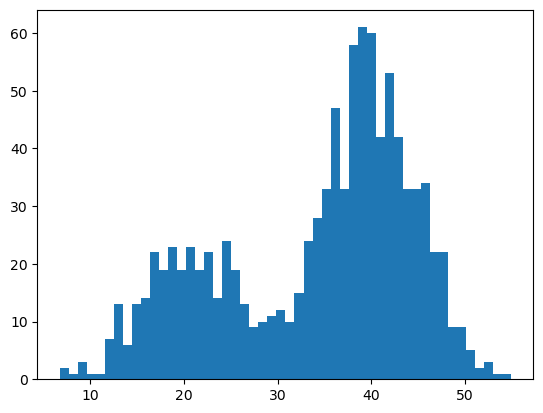

In [21]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [22]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=5, kernel='gaussian')
# convert data to a 2D array
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=5)

In [23]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [24]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

### score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

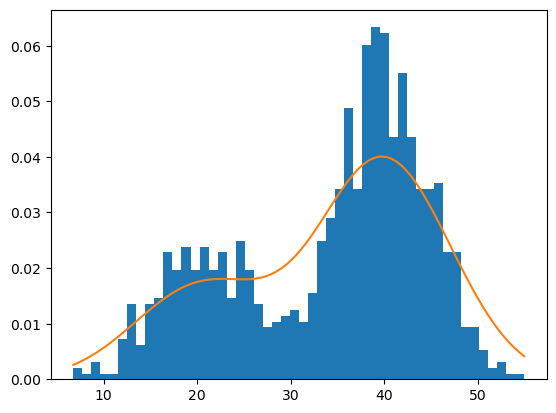

In [25]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

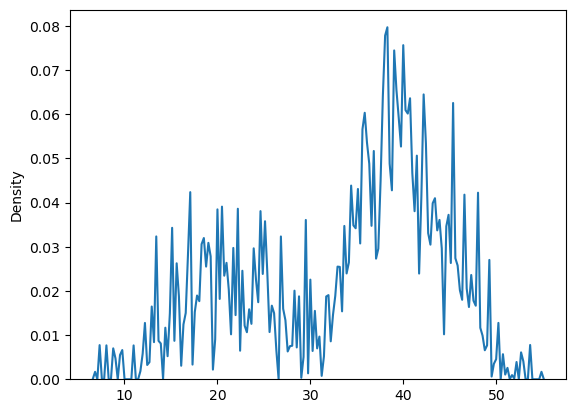

In [26]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [27]:
import seaborn as sns
df = sns.load_dataset('iris')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

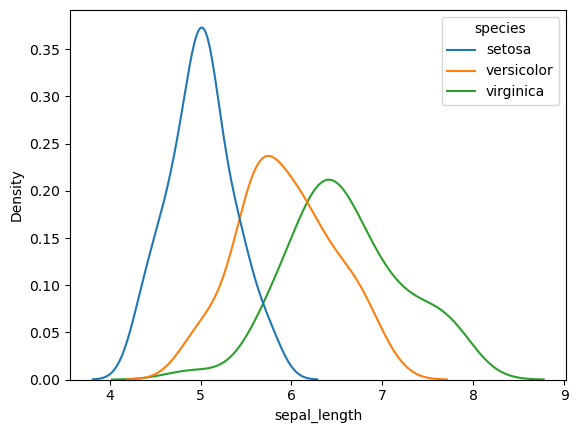

In [29]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

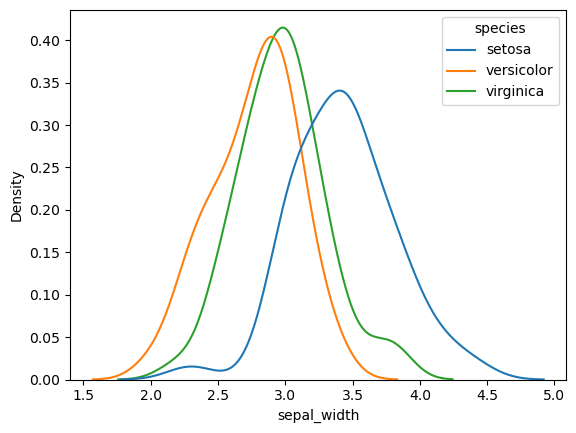

In [30]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

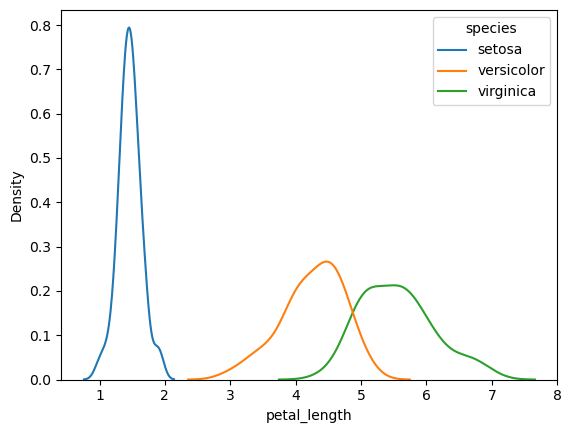

In [31]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

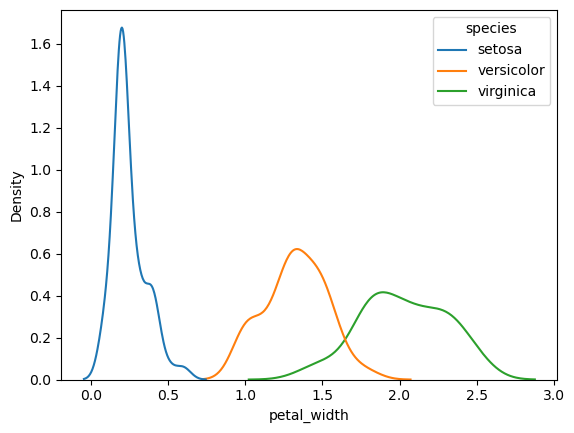

In [32]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

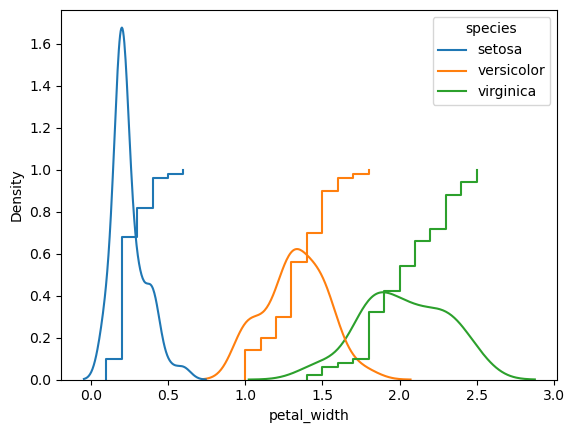

In [33]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [34]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

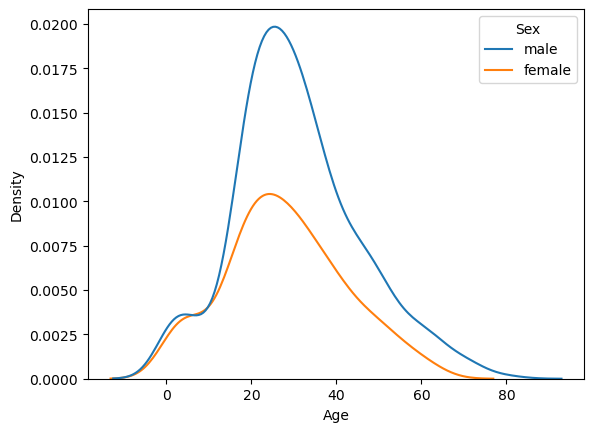

In [36]:
sns.kdeplot(data=titanic,x='Age',hue='Sex')

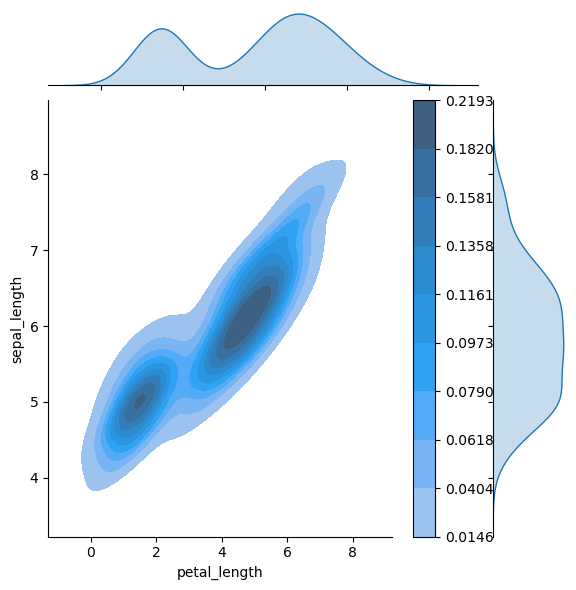

In [37]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

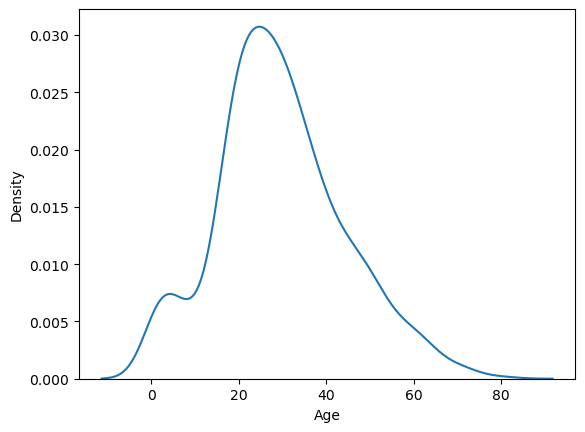

In [38]:
sns.kdeplot(titanic['Age'])

In [39]:
titanic['Age'].mean()

29.69911764705882

In [40]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<AxesSubplot:xlabel='Age', ylabel='Density'>

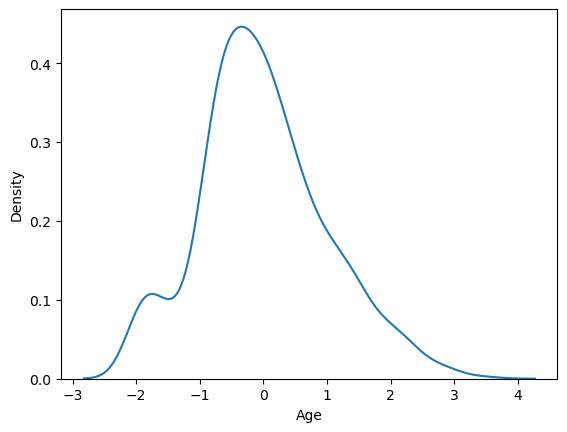

In [41]:
sns.kdeplot(x)

In [42]:
x.mean()

2.0039214607642444e-16

In [43]:
x.std()

0.9999999999999994

In [44]:
titanic['Age'].skew()

0.38910778230082704

In [45]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406095

In [46]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.88037434994331